In [625]:
import pandas as pd

# Läser in data
#om dag efter är blir det helg
data1 = pd.read_csv('2024-11-11frKl21.csv')
data2= pd.read_csv('2024-11-12frKl21.csv')
data3 = pd.read_csv('2024-11-13frKl21.csv')
data4 = pd.read_csv('2024-11-16frKl21.csv')#helg
data5= pd.read_csv('2024-11-18frKl21.csv')
data6 = pd.read_csv('2024-11-23frKl21.csv')#helg
data7 = pd.read_csv('2024-11-24frKl21.csv')
data8= pd.read_csv('2024-11-25frKl21.csv')
data9= pd.read_csv('2024-11-26frKl21.csv')
data10= pd.read_csv('2024-11-27frKl21.csv')
data11= pd.read_csv('2024-11-28frKl21.csv')
data12= pd.read_csv('2024-11-29frKl21.csv')#helg
data13= pd.read_csv('2024-12-01frKl21.csv')
data14= pd.read_csv('2024-12-08frKl21.csv')
data15= pd.read_csv('2024-12-12frKl21.csv')
data16=pd.read_csv('2024-12-13frKl21.csv')

#combined_data_weekday = pd.concat([data1, data2, data3,data4, data5,data6, data7, data8, data9, data10, data11, data12,  data13, data14,data15, data16])
combined_data_weekday = pd.concat([data1, data2, data3, data5, data7, data8, data9, data10, data11,   data13, data14,data15, data16])

#data4, dara6, data12


# Convert 'Unnamed: 0' column to datetime
combined_data_weekday['Unnamed: 0'] = pd.to_datetime(combined_data_weekday['Unnamed: 0'], errors='coerce')

# Extract the time and convert to total seconds
combined_data_weekday['Tid'] = pd.to_timedelta(combined_data_weekday['Unnamed: 0'].dt.time.astype(str))
combined_data_weekday['Tid_num'] = combined_data_weekday['Tid'].dt.total_seconds()

# Optional: Drop unnecessary columns
combined_data_weekday = combined_data_weekday.drop(columns=['Unnamed: 0', 'Tid'], errors='ignore')

#Rensar data från värden med null
cleaned_data_weekday = combined_data_weekday.dropna()
cleaned_data_weekday


,Stockholm E4/E20 Lilla Essingen,Stockholm Hornsgatan 108 Gata,Stockholm St Eriksgatan 83,Stockholm Sveavägen 59 Gata,Stockholm Torkel Knutssongatan,Tid_num
0,14.297,6.049,8.795,11.506,2.937,75600.0
1,15.207,6.203,7.835,7.991,3.949,79200.0
2,13.548,4.426,6.211,8.313,5.155,82800.0
3,11.268,5.902,5.490,9.638,5.236,0.0
4,8.176,5.384,5.399,7.254,6.080,3600.0
...,...,...,...,...,...,...
18,5.222,6.854,7.517,8.248,5.390,54000.0
19,5.707,5.910,7.865,9.079,4.920,57600.0
20,4.033,5.135,8.054,10.304,3.742,61200.0
21,3.384,5.677,7.206,7.696,3.142,64800.0


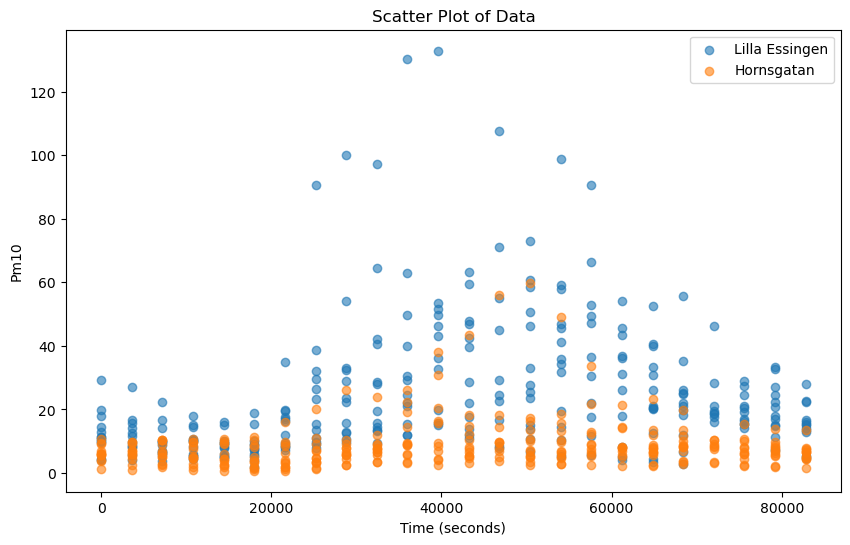

In [627]:

import matplotlib.pyplot as plt

# Replace 'value_column' with the actual column name you want to plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data_weekday['Tid_num'], cleaned_data_weekday['Stockholm E4/E20 Lilla Essingen'], label='Lilla Essingen', alpha=0.6)
plt.scatter(cleaned_data_weekday['Tid_num'], cleaned_data_weekday['Stockholm Hornsgatan 108 Gata'], label='Hornsgatan', alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot of Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Pm10')
plt.legend()

# Show the plot
plt.show()

In [629]:


# Data för platsen essingen, vardag
data_essingen_weekday = cleaned_data_weekday[['Tid_num', 'Stockholm E4/E20 Lilla Essingen']].dropna()

# Delar upp i input(X) och output data(y)
X_essingen_weekday = data_essingen_weekday[['Tid_num']]
y_essingen_weekday = data_essingen_weekday['Stockholm E4/E20 Lilla Essingen']

# Träna och testa
X_train, X_test, y_train, y_test = train_test_split(X_essingen_weekday, y_essingen_weekday, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Beräkna MSE och R² för varje modell
models = {
    "Decision Tree": (dt_y_pred, dt_model),
    "Random Forest": (rf_y_pred, rf_model),
    "Gradient Boosting": (gb_y_pred, gb_model),
    "Linear Regression": (lr_y_pred, lr_model),
}

for name, (y_pred, model) in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n\tMean Squared Error (MSE): {mse:.2f}\n\tR²: {r2:.2f}")

# Testar utfall på specifika tider med Random Forest (som exempel)
specific_times = np.array([[7300], [56400]])
rf_specific_predictions = rf_model.predict(specific_times)

# Kategorisering
bins = [0, 20, 40, 60, 80, 100, 120, 140, np.inf]
labels = [1, 2, 3, 4, 5, 6, 7, 8]

# Omvandla till kategoriska värden
specific_categorized = pd.cut(rf_specific_predictions, bins=bins, labels=labels)

print(f"Random Forest Predictions: {rf_specific_predictions}")
print(f"Categorized Predictions: {specific_categorized}")



Decision Tree:
	Mean Squared Error (MSE): 414.47
	R²: 0.26
Random Forest:
	Mean Squared Error (MSE): 411.09
	R²: 0.27
Gradient Boosting:
	Mean Squared Error (MSE): 414.12
	R²: 0.26
Linear Regression:
	Mean Squared Error (MSE): 537.95
	R²: 0.04
Random Forest Predictions: [ 8.72925659 40.20119544]
Categorized Predictions: [1, 3]
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [631]:
import joblib

#spara model
joblib.dump(rf_model, 'LillaEssingen-pm10-randomForest.joblib')

# Göra uppskattningar
predictionsRF = rf_model.predict([[7300]])
print(predictionsRF)

# Kategorisering
bins = [0, 20, 40, 60, 80, 100, 120, 140, np.inf]
labels = [1, 2, 3, 4, 5, 6, 7, 8]

rf_specific_predictions = rf_model.predict([[7300]])

# Omvandla till kategoriska värden
specific_categorized = pd.cut(rf_specific_predictions, bins=bins, labels=labels)

print(f"Categorized Predictions: {specific_categorized}")


[8.72925659]
Categorized Predictions: [1]
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [526]:
modelDoneLillaEssingen = joblib.load('LillaEssingen-pm10-randomForest.joblib')
predictionsDoneLillaEssingen = modelDoneLillaEssingen.predict([[7300]])
predictionsDoneLillaEssingen

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.82529271])

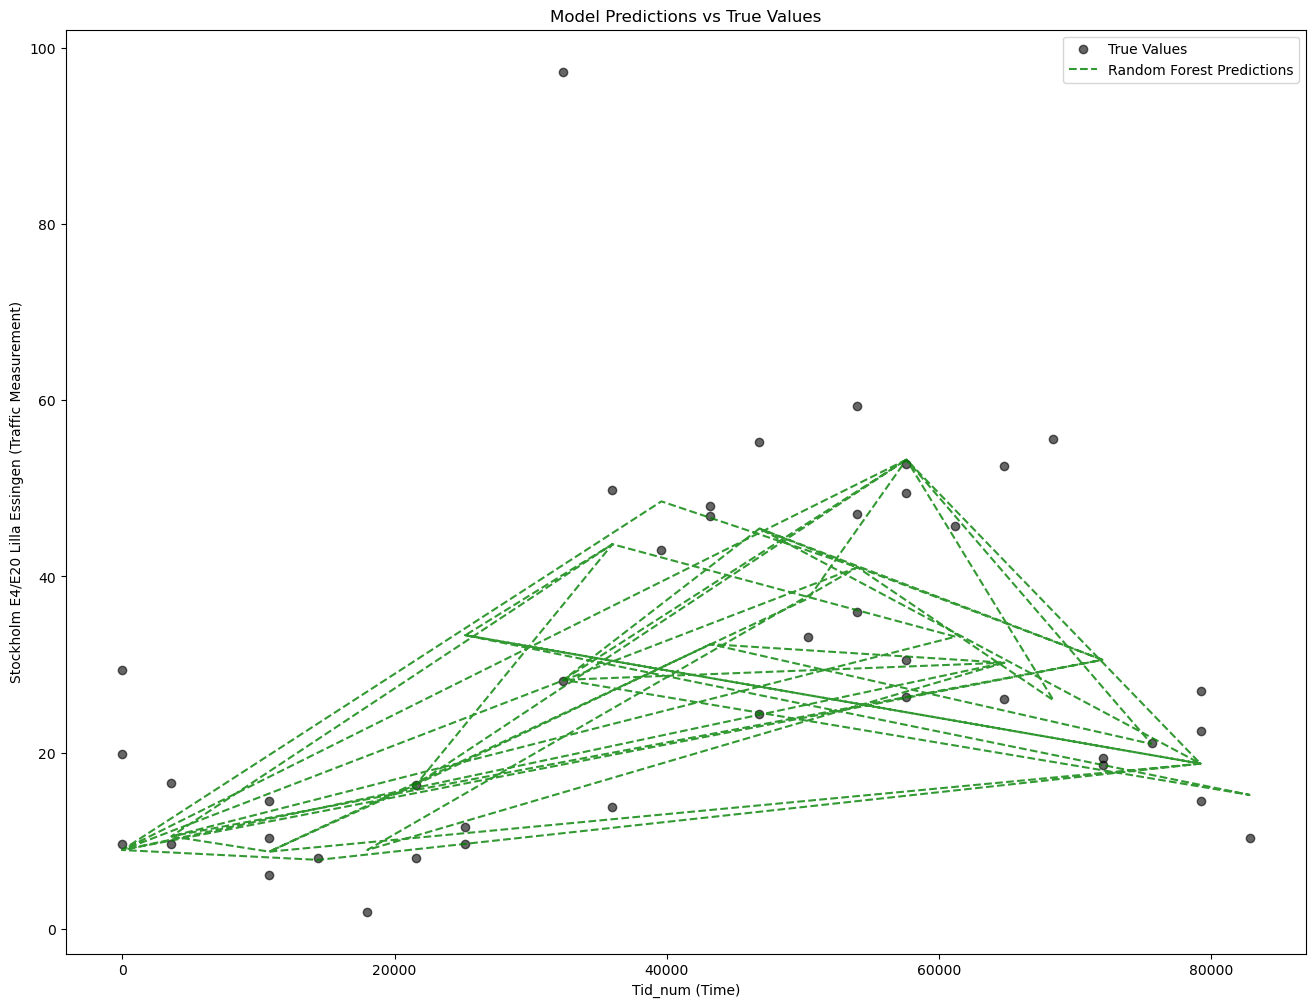

In [510]:
import matplotlib.pyplot as plt

# Visualisera resultaten för varje modell
plt.figure(figsize=(16, 12))

# Plot original data points
plt.scatter(X_test, y_test, color="black", label="True Values", alpha=0.6)

# Plot Decision Tree predictions
#plt.plot(
 #   X_test,
  #  dt_y_pred,
   # color="blue",
    #linestyle="dashed",
    #label="Decision Tree Predictions",
    #alpha=0.8,
#)

# Plot Random Forest predictions
plt.plot(
    X_test,
    rf_y_pred,
    color="green",
    linestyle="dashed",
    label="Random Forest Predictions",
    alpha=0.8,
)

# Plot Gradient Boosting predictions
#plt.plot(
  #  X_test,
  #  gb_y_pred,
  #  color="red",
  #  linestyle="dashed",
  #  label="Gradient Boosting Predictions",
  #  alpha=0.8,
#)

# Plot Linear Regression predictions
#plt.plot(
#    X_test,
 #   lr_y_pred,
   # color="purple",
   # linestyle="dashed",
   # label="Linear Regression Predictions",
  #  alpha=0.8,
#)

plt.title("Model Predictions vs True Values")
plt.xlabel("Tid_num (Time)")
plt.ylabel("Stockholm E4/E20 Lilla Essingen (Traffic Measurement)")
plt.legend()
plt.show()

In [353]:
# aspara model
import joblib

joblib.dump(model, 'luftkvalitet-pm10.joblib')

['luftkvalitet-pm10.joblib']

In [258]:
modelDone = joblib.load('luftkvalitet-pm10.joblib')
predictionsDone = modelDone.predict([[2, 7300], [2, 51400]])
predictionsDone

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 2])